# 基本的なグラフの描き方①

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots
import squarify

## ヒストグラム
データのばらつきを見る

In [2]:
# レストランの店員が受け取ったチップの金額に関するデータセット
tips = sns.load_dataset("tips")
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

`distploy`関数を使う

kde: カーネル密度関数を描画するか否か

/home/aoyg/anaconda3/envs/nlp/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='total_bill'>

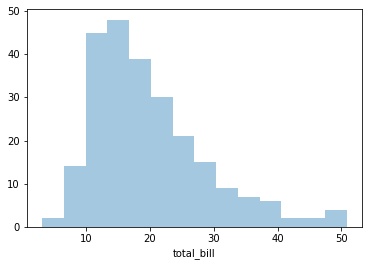

In [3]:
sns.distplot(tips["total_bill"], kde=False)

binsの数を増やすことでより細かい区切りで見れる

<AxesSubplot:xlabel='total_bill'>

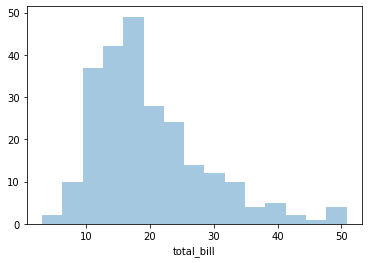

In [4]:
sns.distplot(tips["total_bill"], kde=False, bins=15)

verticalをTrueにすることで横向きに

<AxesSubplot:ylabel='total_bill'>

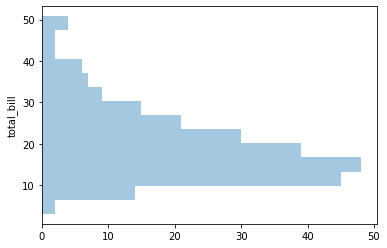

In [5]:
sns.distplot(tips["total_bill"], vertical=True, kde=False)

二つのデータを重ねて表示

<AxesSubplot:xlabel='total_bill'>

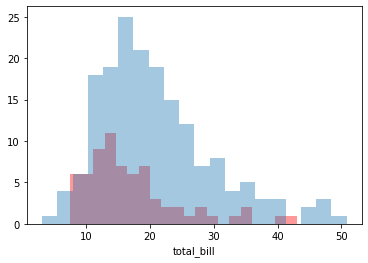

In [6]:
lunch_tips = tips[tips["time"] == "Lunch"]
dinner_tips = tips[tips["time"] == "Dinner"]
sns.distplot(lunch_tips["total_bill"], kde=False, bins=20, color="r")
sns.distplot(dinner_tips["total_bill"], kde=False, bins=20)

## カウントプロット
質的変数について度数分布をビジュアライゼーションする手段に`countplot`がある

<AxesSubplot:xlabel='smoker', ylabel='count'>

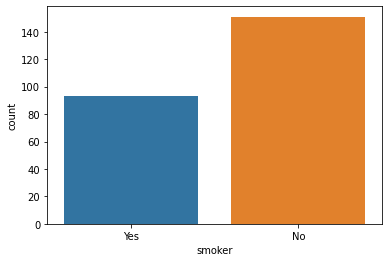

In [7]:
sns.countplot(x="smoker", data=tips)

hue にカラム名を指定することでバーをカラムの値ごとに表示できる

<AxesSubplot:xlabel='smoker', ylabel='count'>

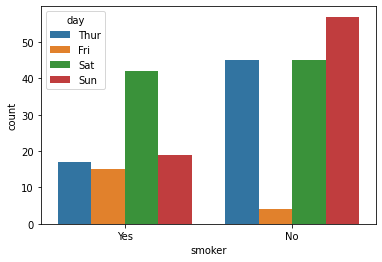

In [8]:
sns.countplot(x="smoker", hue="day", data=tips)

## 箱髭図
データの分布を視覚的に表現

<AxesSubplot:ylabel='total_bill'>

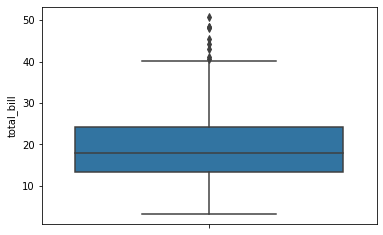

In [9]:
sns.boxplot(y="total_bill", data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

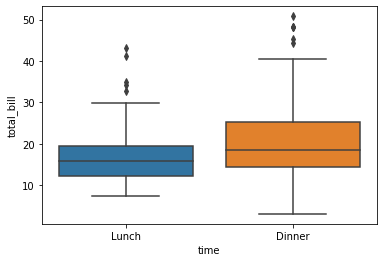

In [10]:
sns.boxplot(x="time", y="total_bill", data=tips)

表示される順位を変更する

<AxesSubplot:xlabel='time', ylabel='tip'>

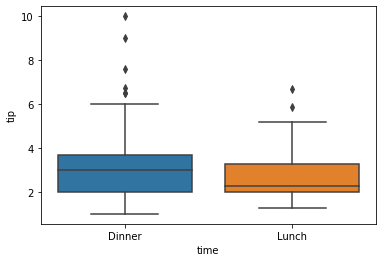

In [11]:
sns.boxplot(x="time", y="tip", order=["Dinner", "Lunch"], data=tips)

属性によってさらに細かく分けて比較する

<AxesSubplot:xlabel='day', ylabel='total_bill'>

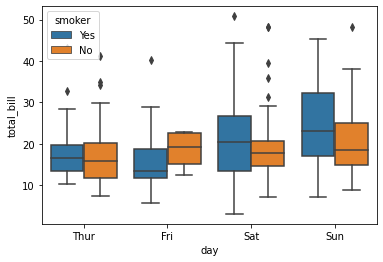

In [12]:
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips)

## 散布図
二つのデータの関係性を確認する際に用いる

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

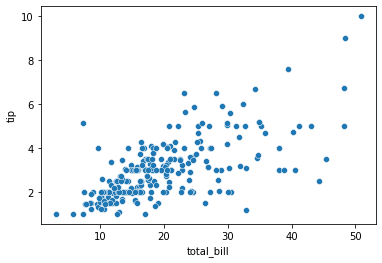

In [13]:
sns.scatterplot(x="total_bill", y="tip", data=tips)

質的変数ごとに色を変える

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

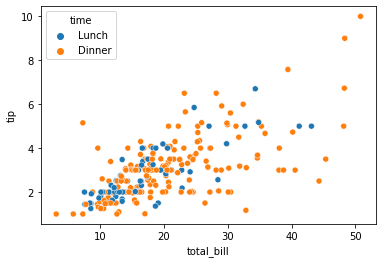

In [14]:
sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips)

styleに違いを見たい変数を指定して形を変える

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

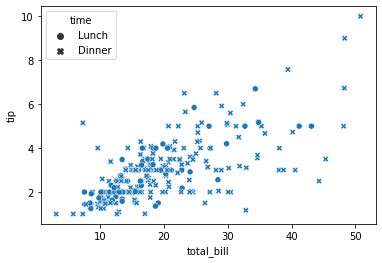

In [15]:
sns.scatterplot(x="total_bill", y="tip", style="time", data=tips)

重なりが多い場合、alphaを指定することで色を透過させる

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

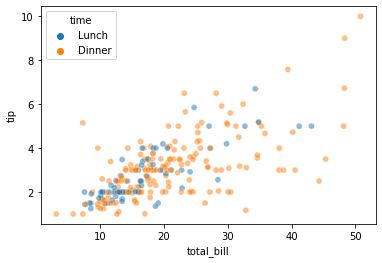

In [16]:
sns.scatterplot(x="total_bill", y="tip", hue="time", alpha=0.5, data=tips)

## バブルチャート
散布図にもう一つ量的変数の要素を加えた表現

`scatterplot`関数の引数sizeに量的変数を指定

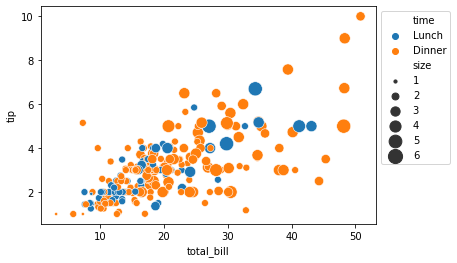

In [17]:
ax = sns.scatterplot(x="total_bill", y="tip", hue="time", size="size",
                     data=tips, sizes=(10, 200)) 
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

plotlyでも描ける

In [18]:
fig = px.scatter(tips, x="total_bill", y="tip", size="size", color="time",
                 size_max=50) 
fig.show()

## 散布図行列
一度に複数の変数の関係性を確認

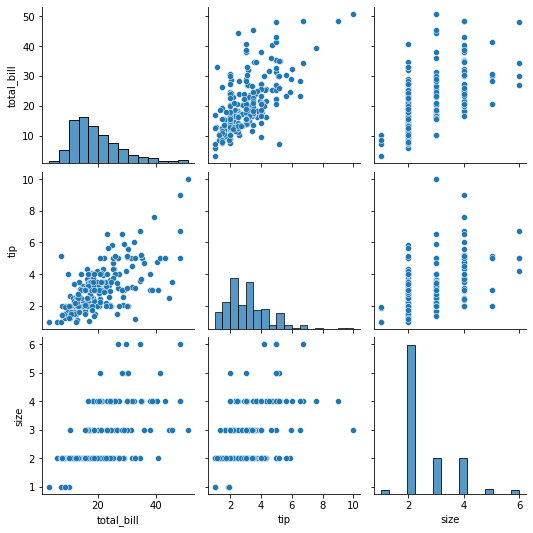

In [19]:
sns.pairplot(data=tips)

hueを指定して色を変える

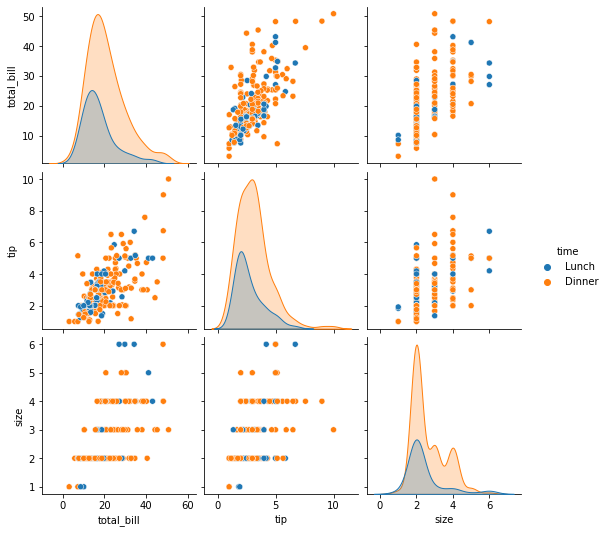

In [20]:
sns.pairplot(data=tips, hue="time")

## ジョイントプロット
2変数について複数のグラフを組み合わせて表示

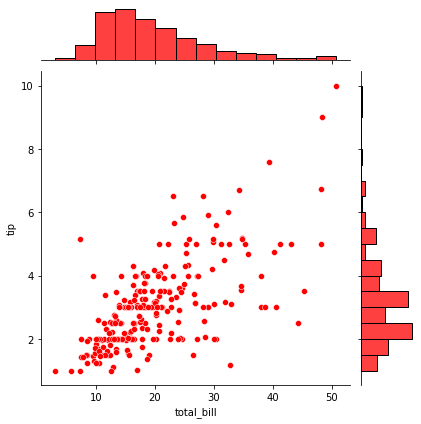

In [21]:
多いときはsns.jointplot(x="total_bill", y="tip", color="r", data=tips)

データ件数が多いときは、散布図を描画すると重なりが多くなる

引数kindにhexを指定すると、六角形のビンで表示したグラフになる

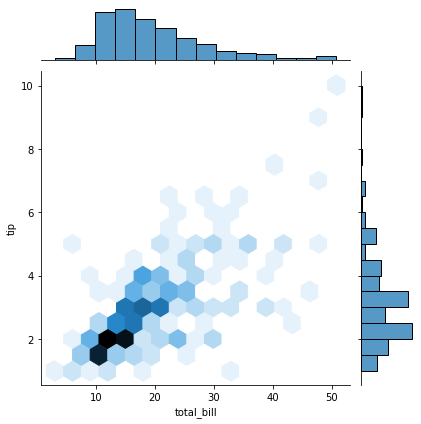

In [22]:
sns.jointplot(x="total_bill", y="tip", kind="hex", data=tips)

## 質的変数のプロット
二つの変数のうち一歩が質的変数の場合の関係性を確認する際に用いる方法

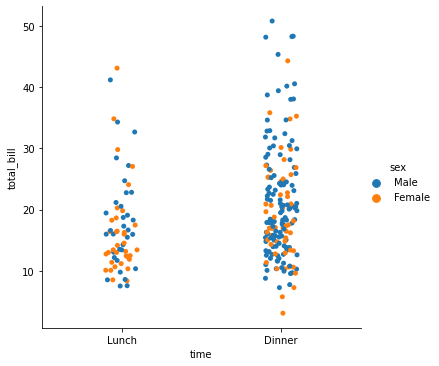

In [23]:
sns.catplot(x="time", y="total_bill", hue="sex", data=tips)

## 平行座標プロット
複数の変数の関係性を確認する際に用いる

dimensionsに量的変数か順序尺度が格納されたカラムを指定する

In [26]:
fig = px.parallel_coordinates(tips,
    dimensions=["total_bill", "tip", "size"])
fig.show()

パラレルセットグラフはデータ数が多い際、質的変数の比較する時に用いられる

リボンの幅が該当するデータの件数割合を表す

In [27]:
fig = px.parallel_categories(tips)
fig.show()